In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [101]:
data_train_path = 'Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/Fruits_Vegetables/validation'

In [102]:
img_width = 180
img_height= 180

In [103]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,  
    image_size=(img_width, img_height),  
    batch_size=256,  
    validation_split=False) 


Found 2248 files belonging to 26 classes.


In [104]:
data_cat = data_train.class_names

In [105]:
data_cat

['apple',
 'banana',
 'bell pepper',
 'cabbage',
 'carrot',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'peas',
 'pineapple',
 'potato',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'watermelon']

In [106]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_width, img_height),
                                                        batch_size=256, 
                                                       shuffle= False,
                                                       validation_split=False)

Found 253 files belonging to 26 classes.


In [107]:
data_test =tf.keras.utils.image_dataset_from_directory(
        data_test_path,
        image_size = (img_width, img_height),
        shuffle = False,
        batch_size=256, 
        validation_split = False
)

Found 258 files belonging to 26 classes.


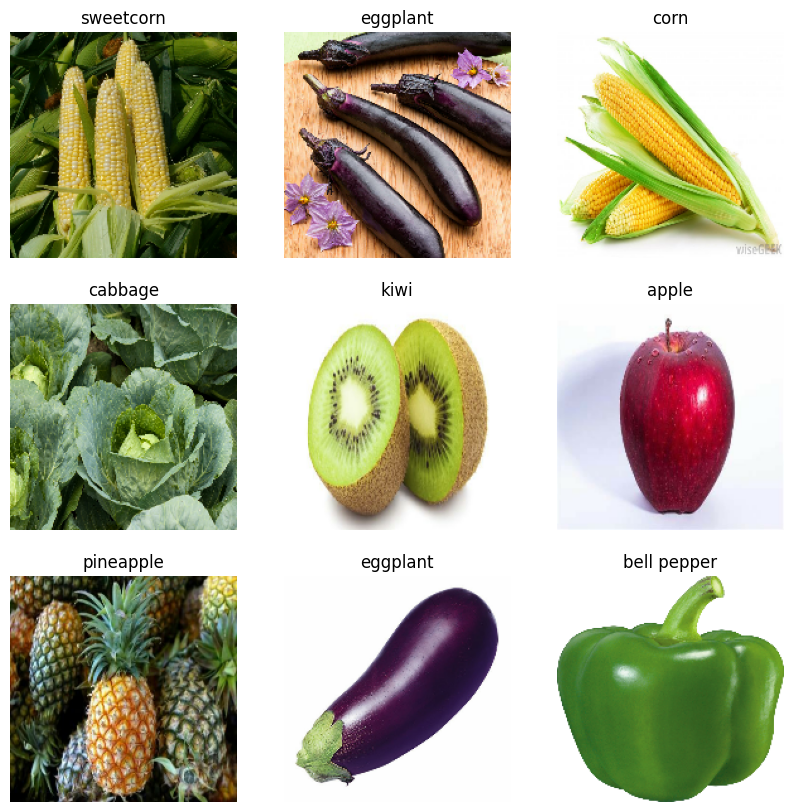

In [108]:
plt.figure(figsize=(10, 10))

# Ambil batch pertama dari data_train
for images, labels in data_train.take(1):  
    # Konversi label jika perlu (opsional, jika one-hot encoded)
    if len(labels.shape) > 1:  
        labels = tf.argmax(labels, axis=1)  # Konversi one-hot menjadi indeks

    for i in range(9):  
        plt.subplot(3, 3, i + 1)  # Grid 3x3
        plt.imshow(images[i].numpy().astype('uint8'))  # Konversi gambar menjadi uint8
        plt.title(data_cat[labels[i].numpy()])  # Konversi tensor label ke integer
        plt.axis('off')  # Hilangkan sumbu
plt.show()

In [109]:
from tensorflow.keras.models import Sequential

In [110]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [111]:
#CNN

model = Sequential([
    layers.InputLayer(input_shape=(180, 180, 3)),  # Definisikan input
    layers.Rescaling(1./255),                     # Normalisasi
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),                          # Dropout sebelum Dense
    layers.Dense(128, activation='relu'),         # Aktivasi ReLU pada Dense
    layers.Dense(len(data_cat), activation='softmax')  # Softmax untuk output
])

In [115]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Default
    metrics=['accuracy']
)


In [116]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val, epochs = epochs_size)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.0543 - loss: 3.3451 - val_accuracy: 0.1265 - val_loss: 3.0563
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1187 - loss: 3.0107 - val_accuracy: 0.2332 - val_loss: 2.5323
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2265 - loss: 2.5665 - val_accuracy: 0.4111 - val_loss: 1.9931
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.3522 - loss: 2.1889 - val_accuracy: 0.5692 - val_loss: 1.5554
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4554 - loss: 1.8557 - val_accuracy: 0.6640 - val_loss: 1.2669
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5205 - loss: 1.6317 - val_accuracy: 0.6996 - val_loss: 1.0707
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5692 - loss: 1.4384 - val_accuracy: 0.7312 - val_loss: 0.9253
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6188 - loss: 1.2547 - val_accuracy: 0.7312 - val_loss: 0.8404
Epoch 9/

Text(0.5, 1.0, 'Loss')

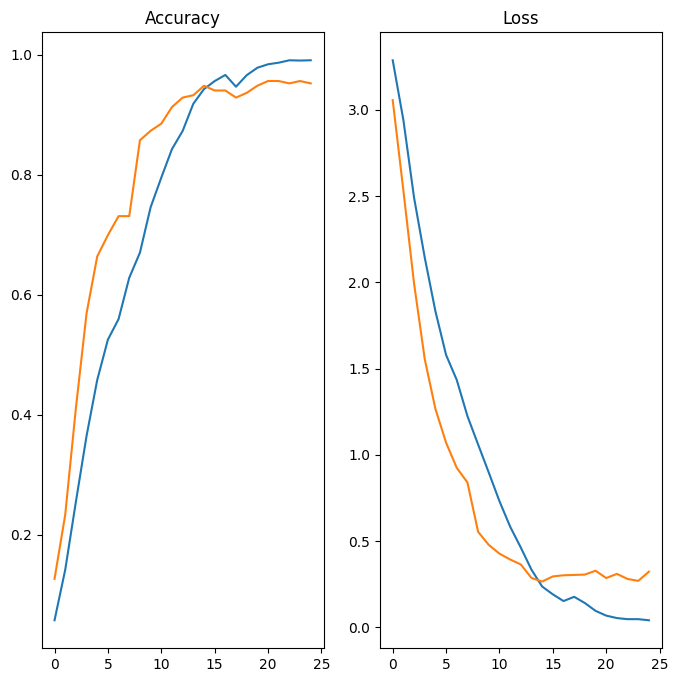

In [212]:
epochs_range = range(epochs_size)
plt.figure(figsize= (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [213]:
image = 'test_1.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))  # Sesuaikan ukuran gambar
img_arr = tf.keras.utils.img_to_array(image)  # Konversi gambar ke array
img_bat = tf.expand_dims(img_arr, 0)  # Tambahkan dimensi batch (bentuk menjadi (1, 180, 180, 3))


In [214]:
predict =model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [215]:
predictions = model.predict(img_bat)  # Lakukan prediksi pada gambar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [216]:
label = data_cat[np.argmax(predictions)]  # Ambil label prediksi
confidence = np.max(predictions) * 100    # Ambil nilai tertinggi dan kalikan dengan 100 untuk persen

# Output hasil prediksi
print(f'Veg/Fruit in image is {label} with an accuracy of {confidence:.2f}%')


Veg/Fruit in image is carrot with an accuracy of 99.99%


In [209]:
model.save('klasifikasi_gambar.keras')


In [210]:
import pickle

In [211]:
filename = 'Klasifikasi_gambar.sav'
pickle.dump(model, open(filename, 'wb'))